In [73]:
import tweepy
import bs4
import re
import textblob as tx
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [38]:
# Step 1 - Authenticate
consumer_key= 'IGdgl3AvLjf8M3eDg4LDfS752'
consumer_secret= 'tbIe2yf34ZXhx9mb8Vmlz6qTA72Rtd2w8n8Cqz9EK890UMl3Ws'

access_token='230026419-rCBLMyQC2EqJbO9a5ul5unyTGzeME60ozvsdIWX6'
access_token_secret='8v0OhF9VDS6lc322PSe3jDUYSb7o4QoJkt4B6C6QSLzAT'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth,)

In [36]:
len(tweet_dict['tweet'])

36

In [37]:
senti=[]
for i in tweet_dict['Sentiment']:
    if i > 0:
        senti.append('Positive')
    elif i < 0:
        senti.append('Negative')
    else:
        senti.append('Neutral')

In [38]:
len(senti)

36

In [269]:
tw=[]
for i in tweepy.Cursor(api.search, q=['#LokSabhaElections2019'], lang='en').items(1000):
    if i.text not in tw:
        #print(' '.join(re.sub("(@[A-Za-z0-9_]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|(@(_\w+))"," ", i.text).split()))
        #tw.append(' '.join(re.sub("(@[A-Za-z0-9_]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|(@(_\w+))"," ", i.text).split()))
        tw.append(i.text.lower())

In [278]:
cl_tw=[' '.join(re.sub("(@[A-Za-z0-9_]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|(@(_\w+))|(#(\w+))"," ", i).split()).replace('rt ','').replace('loksabhaelections2019','') for i in tw]

In [279]:
len(tw)
dict_tw={}
dict_tw['tweet']=[]
dict_tw['Sentiment']=[]

In [280]:
for i in cl_tw:
    dict_tw['tweet'].append(i)
    if tx.TextBlob(i).sentiment.polarity>0:
        dict_tw['Sentiment'].append('Positive')
    elif tx.TextBlob(i).sentiment.polarity<0:
        dict_tw['Sentiment'].append('Negative')
    else:
        dict_tw['Sentiment'].append('Neutral')
        

In [281]:
df = pd.DataFrame(dict_tw)

In [282]:
df['tweet']=df.tweet.str.lower()

In [283]:
df.head()

,tweet,Sentiment
0,pm shri is the game changer in odisha politics...,Negative
1,today campaign2019 at sultanpet constituency,Neutral
2,ccievents announcement of alliance for done b...,Neutral
3,fielded from guna new list of 7 names announce...,Positive
4,did you cast your vote for today thepowertoel...,Neutral


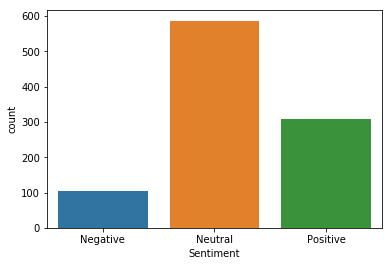

In [284]:
sns.countplot(df.Sentiment)

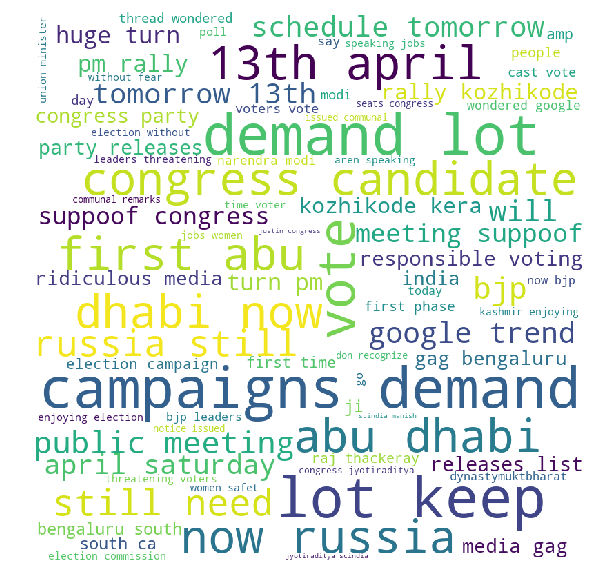

In [285]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = set(STOPWORDS), 
                min_font_size = 10).generate(df.tweet.to_string()) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [286]:
import numpy as np
df['Congress']=np.where(df['tweet'].str.contains('congress'),1,0)
df['BJP']=np.where(df['tweet'].str.contains('bjp'),1,0)

In [287]:
df.head()


,tweet,Sentiment,Congress,BJP
0,pm shri is the game changer in odisha politics...,Negative,0,0
1,today campaign2019 at sultanpet constituency,Neutral,0,0
2,ccievents announcement of alliance for done b...,Neutral,0,0
3,fielded from guna new list of 7 names announce...,Positive,0,0
4,did you cast your vote for today thepowertoel...,Neutral,0,0


In [288]:
from nltk import word_tokenize,pos_tag
from nltk.corpus import stopwords

In [289]:
cong = [i for i in word_tokenize(df[df['Congress']==1].tweet.to_string()) if i not in set(stopwords.words('english'))]
cong_key = list(filter( lambda x:  len(re.findall(r'^([0-9])+|\.+',x))==0,cong))
cong_adj= [i[0] for i in pos_tag(cong_key) if i[1] in ['JJ','JJR','JJS']]
' '.join(cong_adj)

'seve senior se thank congress public suppoof former tirath bjp hailakandi public congress great myvoteforcongress abhoganyay public suppoof public suppoof former tirath former tirath bjp hailakandi criminal public suppoof tough rajthackeray second confident former tirath public lunkaransar first former tirath public suppoof rajthackeray second confident congress jyotiraditya manish laser first first true last rajthackeray second public suppoof god god mind public suppoof public suppoof candid former tirath rajasthan public suppoof necessary necessary former tirath saharanpur public suppoof public suppoof congress mp justin jyotiraditya manish congress confident jyotiraditya manish public suppoof public suppoof list jyotiraditya manish govt congress confident congress jyotiraditya manish public suppoof green congress mam mba tashkent jyotiraditya manish jyotiraditya manish candid public suppoof public lunkaransar cong public suppoof candid public suppoof next jyotiraditya manish public

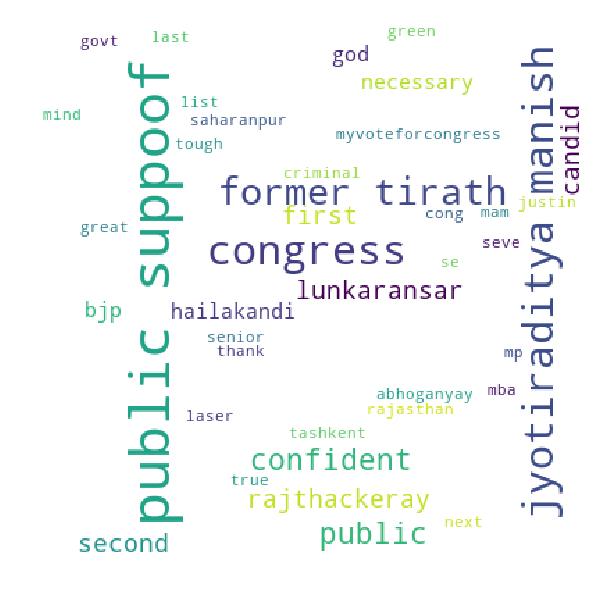

In [290]:
wordcloud = WordCloud(width = 400, height = 400, 
                background_color ='white', 
                stopwords = set(STOPWORDS), 
                min_font_size = 10).generate(' '.join(cong_adj)) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [291]:
bjp = [i for i in word_tokenize(df[df['BJP']==1].tweet.to_string()) if i not in set(stopwords.words('english'))]
bjp_key = list(filter( lambda x:  len(re.findall(r'^([0-9])+|\.+',x))==0,bjp))
bjp_adj= [i[0] for i in pos_tag(bjp_key) if i[1] in ['JJ','JJR','JJS']]
' '.join(bjp_adj)

'senior arithmetic favour rajasthan former tirath wale ram kerala bjp modi former tirath superb pragya former tirath bjp criminal illi bjp bjp bjp bjp bjp namo dedicate former tirath former tirath indian vs early vs bjp gujarat surprising haryana dal nammathalaivarra early vs alternative inclusive illi illi able bengal wale able bengal illi god unnao wale god former tirath wale govt apkibarmodisarkar wale former tirath surprising bjp better mi wale clear hateful bjp basti cm universit bjp political youngest govern india former vs google early rs bsp cong early wale wale bjp'

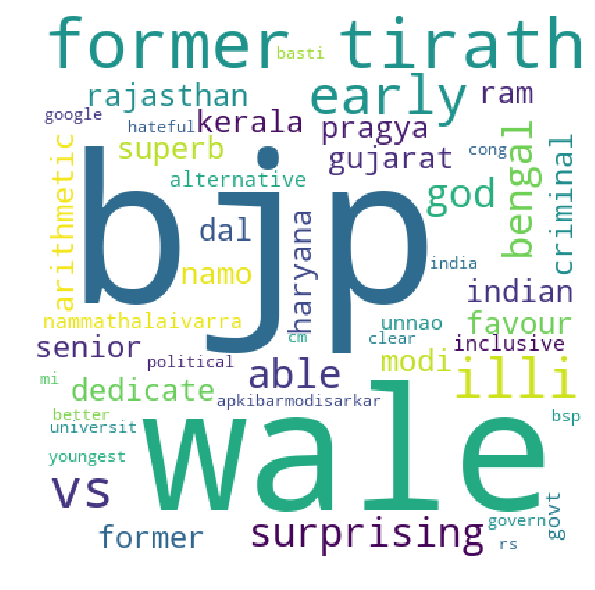

In [292]:
wordcloud = WordCloud(width = 400, height = 400, 
                background_color ='white', 
                stopwords = set(STOPWORDS), 
                min_font_size = 10).generate(' '.join(bjp_adj)) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 